## Overview

I collected data from a .csv file to graph it using matplotlib. I did so by mostly splitting the file into lines, then the lines into data points (which are represented by single letters). I then summed up the individual points to create entries that I placed as arguments in my polot functions. 

The main point of this project was to have a better representation of Notre Dame's gender and ethnic distributions, and understand the problems the university might have in terms of its diversity.

My main takeaway was that the CSE department is not a very diverse place, even through I would like to think it is. It got me thinking about how to treat this while keeping a good eye on the methods we apply to solve the problem

## Methodology

In [1]:
import matplotlib.pyplot as plt

def plot_ethnicity_pct(data):
    caucasian = []
    asian = []
    hispanic = []
    black = []
    native = []
    multiple = []
    undeclared = []
    
    years = sorted(data.keys())
    for year in years:
        c = data[year]['C']
        o = data[year]['O']
        s = data[year]['S']
        b = data[year]['B']
        n = data[year]['N']
        m = data[year]['T']
        u = data[year]['U']
        t = c+o+s+b+n+m+u
        
        caucasian.append(c *100/t)
        asian.append(o *100/t)
        hispanic.append(s *100/t)
        black.append(b *100/t)
        native.append(n *100/t)
        multiple.append(m *100/t)
        undeclared.append(u *100/t)
        
    plt.plot([],[],color='b', label='Caucasian', linewidth = 5)
    plt.plot([],[],color='g', label='Asian', linewidth = 5)
    plt.plot([],[],color='r', label='Hispanic', linewidth = 5)
    plt.plot([],[],color='c', label='Black', linewidth = 5)
    plt.plot([],[],color='m', label='Native', linewidth = 5)
    plt.plot([],[],color='y', label='Multiple', linewidth = 5)
    plt.plot([],[],color='k', label='Undeclared', linewidth = 5)
    
    plt.stackplot(years, caucasian,asian,hispanic,black,native,multiple,undeclared, colors=['b', 'g', 'r', 'c', 'm', 'y', 'k'])
    
    plt.xlabel('Year')
    plt.ylabel('Percent')
    plt.title('Ethnicity at Notre Dame over time')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

In [2]:
import matplotlib.pyplot as plt

def plot_gender_pct(data):
    fig, ax = plt.subplots(1,1,figsize=(10, 8))
    years   = sorted(data.keys())
    males   = []
    females = []
    for year in years:
        m = data[year]['M']
        f = data[year]['F']
        t = m + f
        males.append(m * 100.0 / t)
        females.append(f * 100.0 / t)

    ax.bar(years, females, color='r', label='Female')
    ax.bar(years, males, bottom=females, color='b', label='Male')

    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

In [3]:
# Imports
import collections
import requests

from collections import defaultdict
# Fetch demographic data
r = requests.get('https://www3.nd.edu/~pbui/teaching/cse.20289.sp18/static/csv/demographics.csv')
lines = []
lines = r.text.splitlines()

# Getting years (we know that year is the first row we have)
years = []
years = lines[0].split(',,')

info = defaultdict(lambda : defaultdict(lambda: int(0)))
# Iterating through our itmes by using both lines and years through accessing their indexes
for line in lines:
    ln = []
    ln = line.split(',')
    for index in range(0,len(years)):
        info[years[index]][ln[2*index]]+=1  # Getting gender
        info[years[index]][ln[2*index + 1]]+=1      # Getting ethnicity

## Analysis

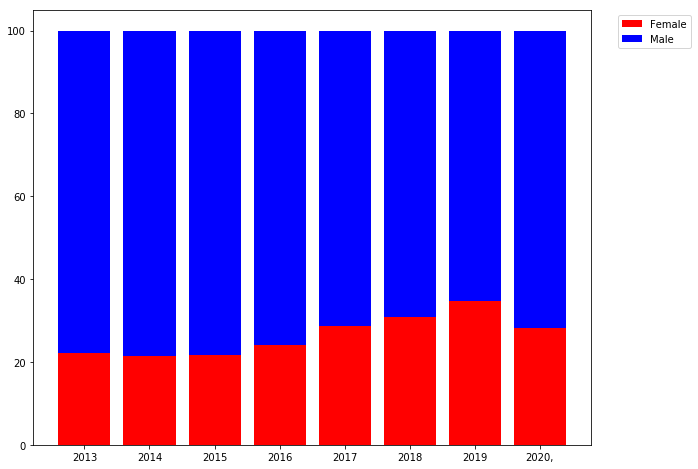

In [4]:
plot_gender_pct(info)

### Gender at Notre Dame:
The gender distribution for the CSE students at notre dame is heavily skewed towards male. However, there is a slight improvement in this trend up until 2020 (sorry!)

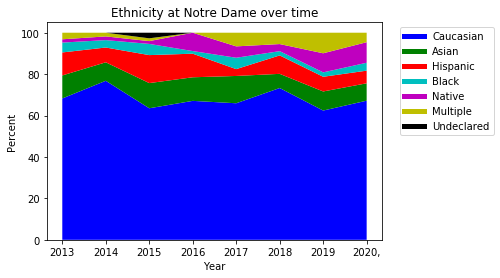

In [5]:
plot_ethnicity_pct(info)

### Ethnicity:
Ethnicity's distribution hasn't changed much over the years, there have been fluctuations here and there, but in general, the student body is still predominantly Caucasian.

## Discussion

+ I'm not from the US, so I have a very different perspective of gender and ethnic diversity. I however do beleive that the definition of diversity in the US is very shallow: I don't think that race/gender are universal indicators of privilege, and that class is really what determines the opportunity someone will get. In that spirit, I think the university could benefit from socioeconomic diversity because of the different viewpoints the students can obtain, and how people of different backgrounds have their own preconceptions about others - which can be shattered in the right setting.

+ I think CSE does a fine job of making me feel welcome and supported. The faculty are fantastic, and the resources available are enough to succeed (some really great TAs in the CSE classes I've had so far). The students themselves are also very respectful and welcoming, and I've never felt excluded by them

+ The challenges have been about the workload and trying to stay on top of classes, while still managing to lead a fairly sociable life. I don't mind the rigorousness of it, and I beleive 